<a href="https://colab.research.google.com/github/chethankotian2005/INTERNSHIP/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Customer Segmentation for a Retail Store

**Project Type**: Customer Segmentation  
**Techniques Used**: K-Means, Elbow Method  
**Dataset Source**: Mall Customers Dataset (Kaggle)  
**Project Prepared By**: Chethan V Kotian  

---

## GitHub Link
[GitHub Repository](https://github.com/chethankotian2005/INTERNSHIP/blob/main/Project3.ipynb/)  

---

## Problem Statement
Retail businesses often serve a wide variety of customers. Some customers have high income but spend less, while others spend more despite lower income.  
Without clear segmentation, it becomes difficult to design effective marketing strategies.  
This project aims to apply **K-Means clustering** to identify meaningful customer groups and provide insights that can guide **business decisions**.  



## Introduction  
Retail stores have a diverse customer base. Some customers spend a lot, while others spend very little.  
Understanding these differences is important to create personalized marketing strategies.  
This project uses **K-Means clustering** to group customers into segments based on their **Annual Income** and **Spending Score**.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Elbow Method to Find Optimal Clusters

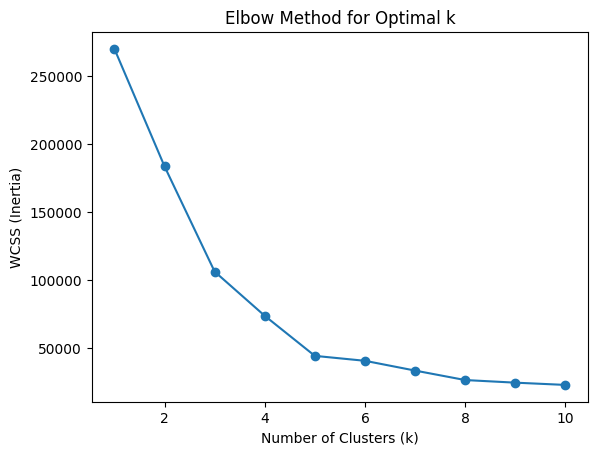

In [7]:

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


## K-Means Clustering

In [8]:

# Choose k=5 (based on Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Cluster centers
kmeans.cluster_centers_


array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [10]:
# Quick cluster summary: sizes and example rows per cluster
print("Cluster sizes:")
print(df['Cluster'].value_counts().sort_index())

print("\nCluster centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

print("\nSample members from each cluster:")
for c in sorted(df['Cluster'].unique()):
    print(f"\n--- Cluster {c} sample ---")
    display(df[df['Cluster']==c].head(3))

Cluster sizes:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Cluster centers:
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043

Sample members from each cluster:

--- Cluster 0 sample ---


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0



--- Cluster 1 sample ---


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1



--- Cluster 2 sample ---


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2



--- Cluster 3 sample ---


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,3
128,129,Male,59,71,11,3
130,131,Male,47,71,9,3



--- Cluster 4 sample ---


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4


## Visualization of Clusters

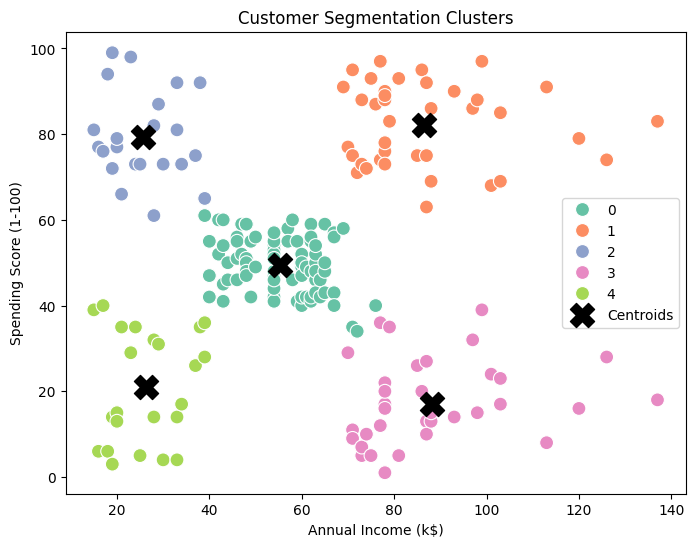

In [11]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', s=300, marker='X', label='Centroids')
plt.legend()
plt.title("Customer Segmentation Clusters")
plt.show()



## Conclusion  
- **Cluster 1**: Low income, low spending → Least valuable group  
- **Cluster 2**: Low income, high spending → Impulsive buyers  
- **Cluster 3**: High income, low spending → Potential customers to target  
- **Cluster 4**: High income, high spending → VIP customers  
- **Cluster 5**: Average income & spending → Middle customers  

 **Business Value**: By identifying these customer groups, the retail store can personalize marketing strategies, increase customer satisfaction, and maximize profits.
